# 이상 확률 변수 x와 확률분포

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

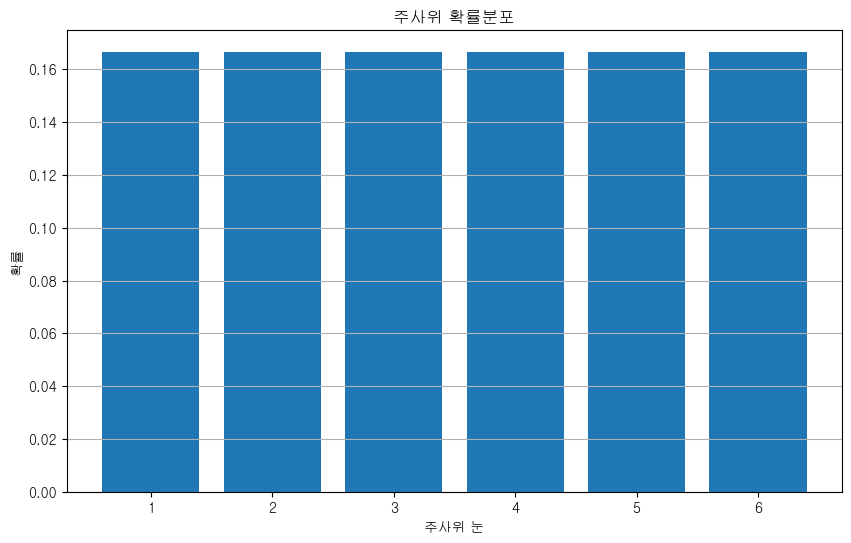

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 주사위 눈 (1~6)
x = np.arange(1, 7)
# 공정한 주사위의 확률분포: 모두 1/6
probs = [1/6] * 6  #6을 곱하는 이유는  6번 반복해서 리스트로 만든다는 의미 - 각 눈별로 확률이 동일하므로 모두 1/6로 설정

# 시각화
plt.bar(x, probs)
plt.xticks(x)
plt.xlabel("주사위 눈")
plt.ylabel("확률")
plt.title("주사위 확률분포")
plt.grid(axis='y')
plt.show()

In [10]:
# 기대값
data = {
    '상금': [0,100,1000], # x
    '확률': [0.5, 0.3, 0.2] # f(x)
}
df = pd.DataFrame(data)
df['exp_value'] = df['상금'] * df['확률']
print(f'복권의 기대값: {df['exp_value'].sum()}원')

복권의 기대값: 230.0원


In [16]:
# 베르누이 분포 예시 - 동전 던지기
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# 베르누이 분포 파라미터 설정
p = 0.5  # 앞면이 나올 확률

# 베르누이 확률변수 생성
X = bernoulli(p)
X

In [17]:
# 1회 시행 결과 시뮬레이션 (0: 뒷면, 1: 앞면)
result = X.rvs(size=1)
print(f"동전 1회 던지기 결과: {'앞면' if result[0] == 1 else '뒷면'}")

동전 1회 던지기 결과: 뒷면


In [ ]:
# 여러 번 시행 결과 시뮬레이션
n_trials = 1000
results = X.rvs(size=n_trials)

np.sum(results) # 앞면인 횟수 => 성공

np.int64(488)

In [ ]:
# 결과 분석
success_count = np.sum(results)
success_rate = success_count / n_trials

1000번 던졌을 때 앞면 나온 횟수: 488
앞면 나올 확률 (이론값: 0.5, 실험값: 0.4880)


1000번 던졌을 때 앞면 나온 횟수: 488
앞면 나올 확률 (이론값: 0.5, 실험값: 0.4880)


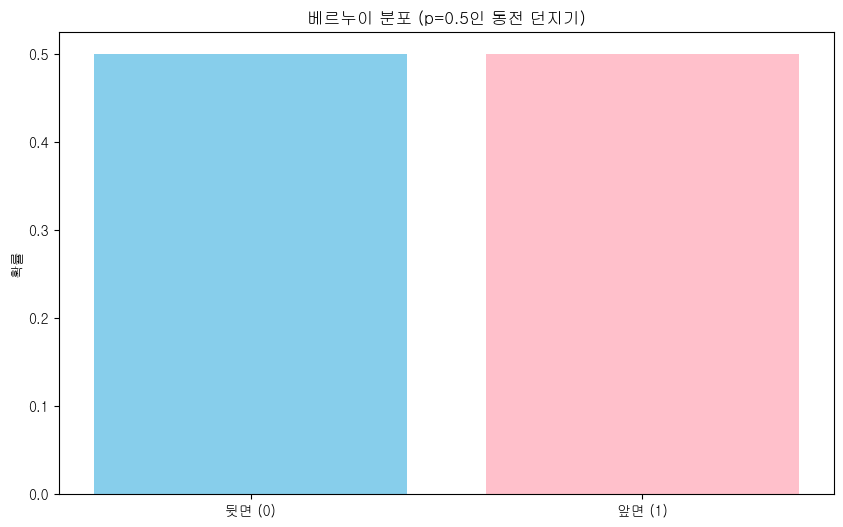

In [26]:
print(f"1000번 던졌을 때 앞면 나온 횟수: {success_count}")
print(f"앞면 나올 확률 (이론값: {p}, 실험값: {success_rate:.4f})")

# 시각화
plt.figure(figsize=(10, 6))
plt.bar([0, 1], [1-p, p], color=['skyblue', 'pink'])
plt.xticks([0, 1], ['뒷면 (0)', '앞면 (1)'])
plt.ylabel('확률')
plt.title('베르누이 분포 (p=0.5인 동전 던지기)')
plt.show()

# 이항분포

n번, m번 성공횟수

In [28]:
from scipy.stats import binom

In [35]:
# 이항 분포 파라미터 설정
n = 10  # 시행 횟수
p = 0.5  # 성공 확률(동전 앞면이 나올 확률)

# 이항 확률변수 생성
X = binom(n, p)

# 가능한 모든 결과값(0부터 n까지)
k_values = np.arange(0, n+1)

# 각 결과값의 확률 계산
pmf_values = X.pmf(k_values)


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

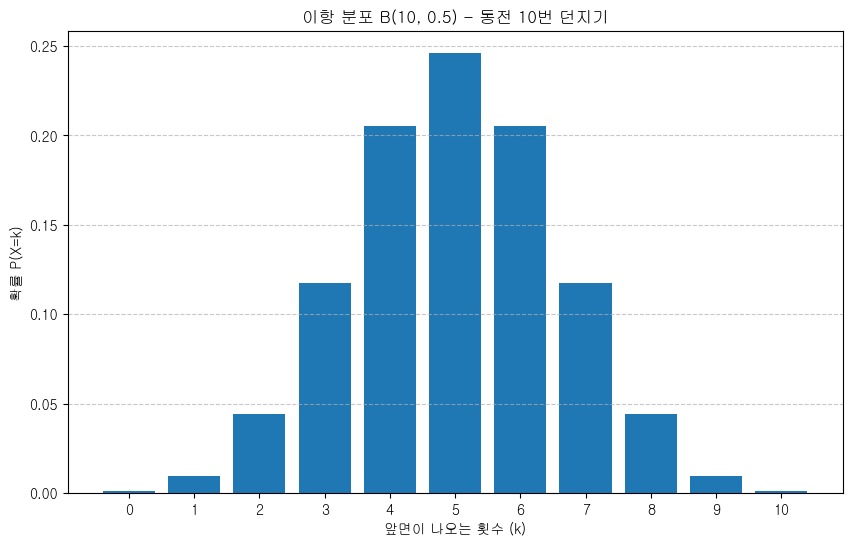

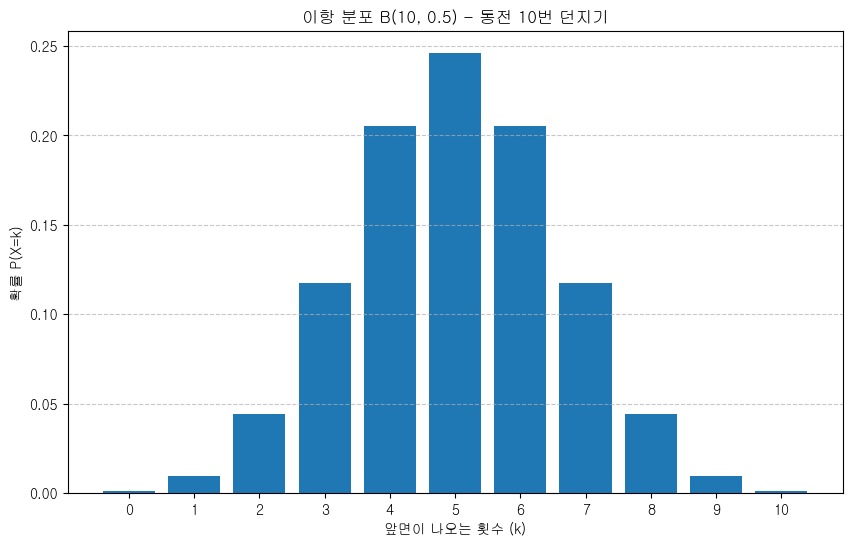

In [37]:
# 결과 시각화
plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf_values)
plt.xlabel('앞면이 나오는 횟수 (k)')
plt.ylabel('확률 P(X=k)')
plt.title(f'이항 분포 B({n}, {p}) - 동전 10번 던지기')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


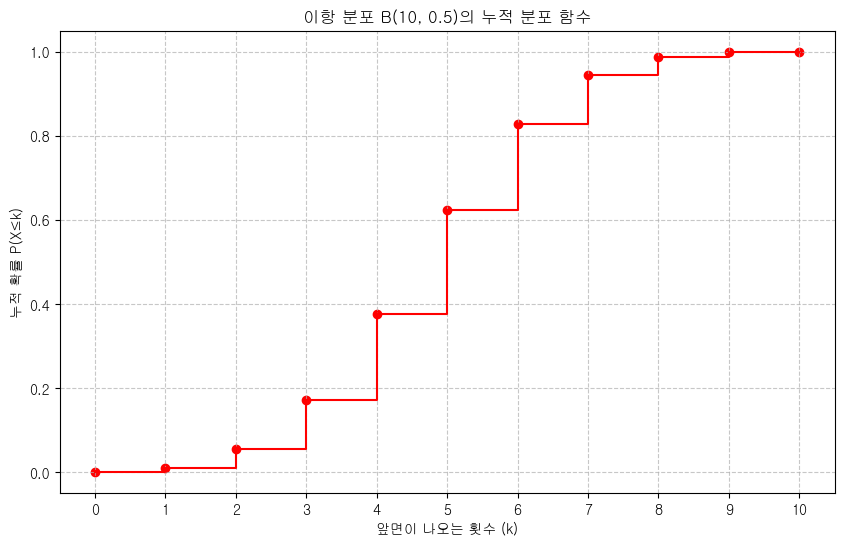

In [39]:
# 누적 분포 함수(CDF) 계산 및 시각화
cdf_values = X.cdf(k_values)

plt.figure(figsize=(10, 6))
plt.step(k_values, cdf_values, where='post', color='red')
plt.scatter(k_values, cdf_values, color='red')
plt.xlabel('앞면이 나오는 횟수 (k)')
plt.ylabel('누적 확률 P(X≤k)')
plt.title(f'이항 분포 B({n}, {p})의 누적 분포 함수')
plt.xticks(k_values)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# 이항분포를 적용할 수 있는 사례

1. 시험 확률이 70%, 100명, 80명 이상 합격할 확률
2. 불량률 5%, 20개 샘플, 불량제품이 2개 이하일 확률

# 푸아송 분포

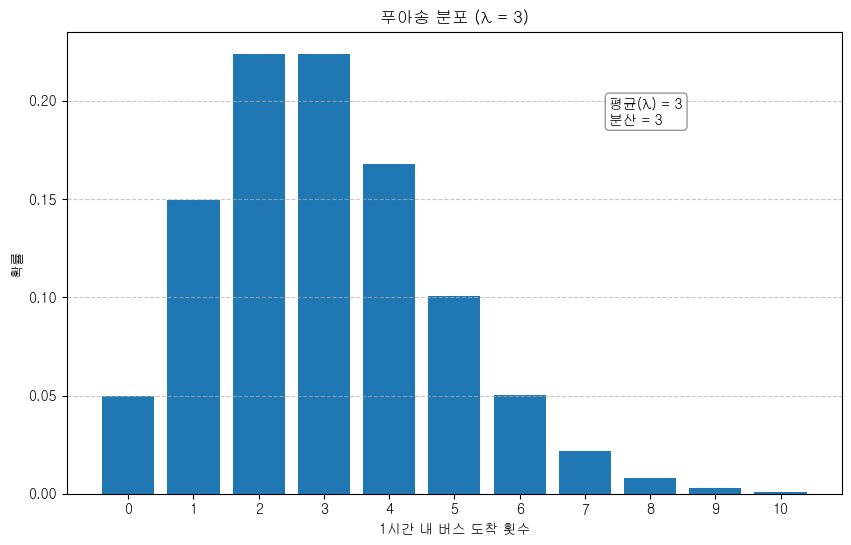

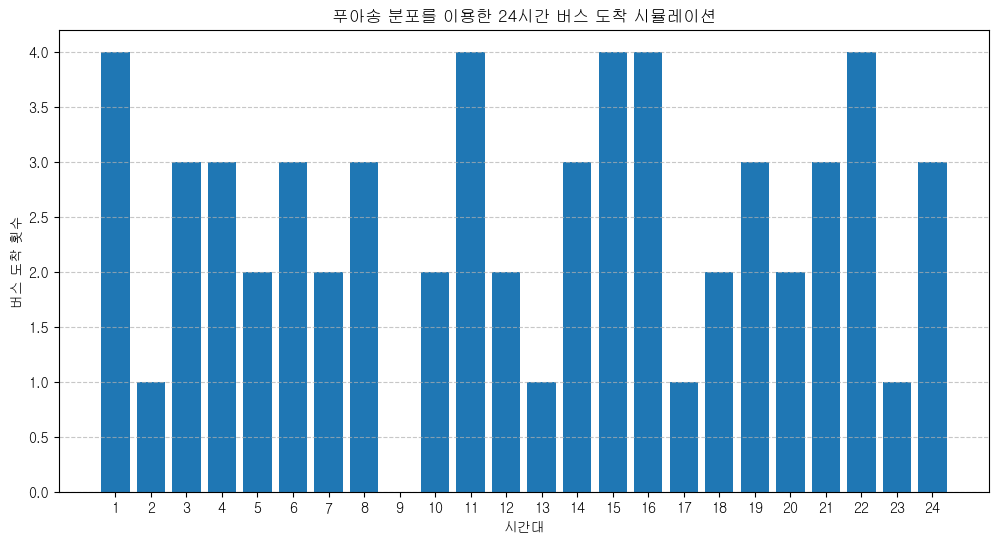

In [41]:
# 푸아송 분포 - 버스 도착 시뮬레이션
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 파라미터 설정
lambda_val = 3  # 1시간당 평균 버스 도착 횟수

# 푸아송 확률변수 생성
X = poisson(lambda_val)

# 가능한 버스 도착 횟수 (0부터 10까지)
k_values = np.arange(0, 11)

# 각 값에 대한 확률 계산
pmf_values = X.pmf(k_values)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf_values)
plt.xlabel('1시간 내 버스 도착 횟수')
plt.ylabel('확률')
plt.title(f'푸아송 분포 (λ = {lambda_val})')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 평균과 분산 표시
plt.annotate(f'평균(λ) = {lambda_val}\n분산 = {lambda_val}', 
             xy=(0.7, 0.8), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.show()

# 시뮬레이션: 하루(24시간) 동안의 버스 도착 패턴
np.random.seed(42)
hours = np.arange(1, 25)
arrivals = np.random.poisson(lambda_val, size=24)

plt.figure(figsize=(12, 6))
plt.bar(hours, arrivals)
plt.xlabel('시간대')
plt.ylabel('버스 도착 횟수')
plt.title('푸아송 분포를 이용한 24시간 버스 도착 시뮬레이션')
plt.xticks(hours)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


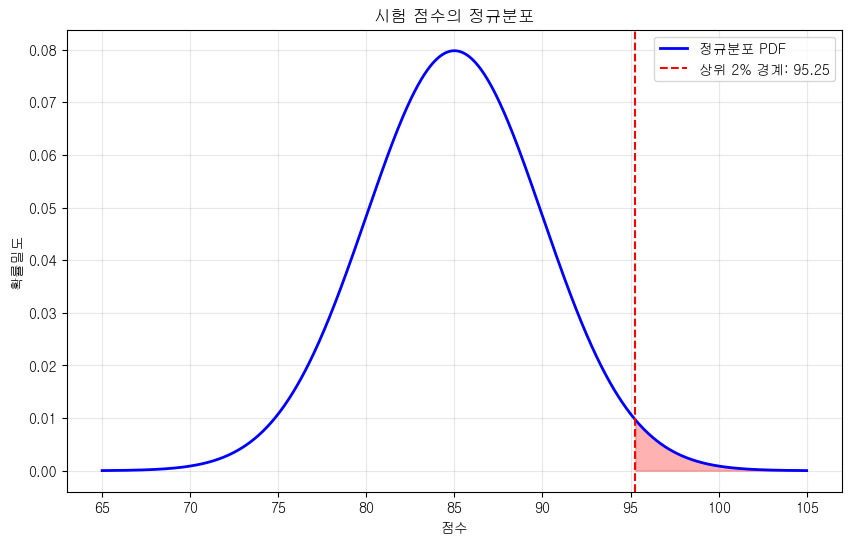

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 정규분포 예시 코드
mu = 85  # 평균
sigma = 5  # 표준편차

# 정규분포의 확률밀도함수
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = stats.norm.pdf(x, mu, sigma)

# 상위 2%에 해당하는 점수 계산
z_score = 2.05
critical_value = mu + z_score * sigma

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-', lw=2, label='정규분포 PDF')
plt.axvline(critical_value, color='r', linestyle='--', label=f'상위 2% 경계: {critical_value:.2f}')
plt.fill_between(x, pdf, where=(x >= critical_value), alpha=0.3, color='r')

# 그래프 꾸미기
plt.title('시험 점수의 정규분포')
plt.xlabel('점수')
plt.ylabel('확률밀도')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# 카이제곱 분포

카이제곱 분포에서 적합도 / 독립성 검정\
H0: 범주간 차이가 없다\
H1: 차이가 있다. 샘플링한 그룹에 평향이 있을 수 있다. 적합도가 떨어진다

카이제곱 통계량 => 관측값과 기대값과의 차이를 수치화

p-value < 0.05 H0 기각, H1 채택\
값이 작을수록, 관측값이 기대값과 가깝다는 결론

# 이산확률분포
- 베르누이: 성공|실패
- 이항분포: 횟수, 성공의 횟수를 모델링
- 포아송분포: 단위 (시간/공간)내에서 사건의 발생횟수를 모델링, 평균 발생율
- 기하분포, 초기하분포, 다항분포

# 연속확률분포
- 정규분포: 평균 중심 - 좌우 대칭, 평균/표준편차
- 표준정규분포: 평균 = 0, 표준편차 = 1인 정규분포 => z점수로 확률값을 확인
- 카이제곱분포: 정규분포를 따르는 독립변수들의 제곱을 합한 것 - 적합도 / 등실성 / 분산(변동성), 자유도 => 정규분포화
- f분포: 두 분산의 비율 비교, ANOVA (3개 이상 그룹의 분산비교)

# 기계학습
분류, 회귀 - 방정식/오차 => 정규분포\
시뮬레이션 -  x를 추출